In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
try:
    df = pd.read_csv('vindra_store_SQL.csv')
    print("File loaded successfully!")
except FileNotFoundError:
    print("Error: 'vindra_store_SQL.csv' not found.")
    print("Please make sure the CSV file is in the same directory as your Jupyter Notebook.")
    df = pd.DataFrame()

File loaded successfully!


In [38]:
# Convert the 'date' column to datetime objects for proper sorting
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [39]:
 # Clean up column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_73796\676490702.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


Text(0, 0.5, 'Total Sales (Amount)')

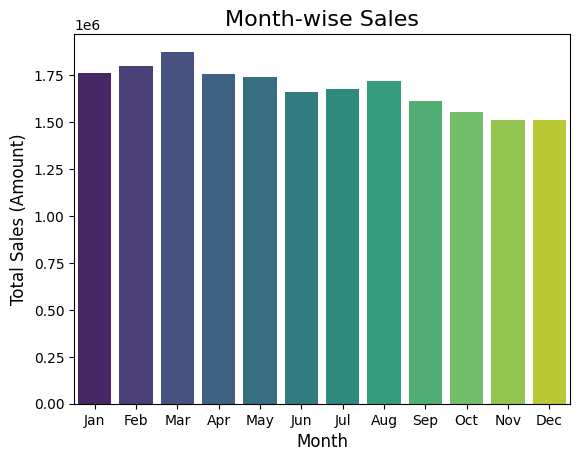

In [36]:
 # 1. Month-wise Sales (Bar Chart)
plt.subplot()
monthly_sales = df.groupby('month')['amount'].sum().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Month-wise Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (Amount)', fontsize=12)

Text(0, 0.5, '')

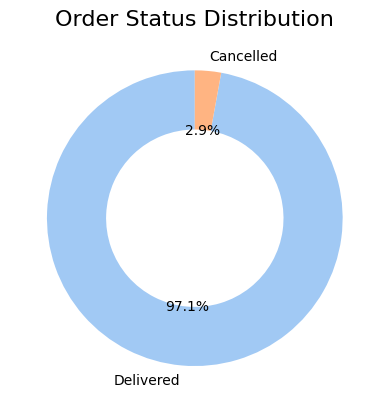

In [20]:
# 2. Order Status (Donut Chart)
plt.subplot()
status_counts = df['status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.4))
plt.title('Order Status Distribution', fontsize=16)
plt.ylabel('') # Hide the y-label

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_73796\3869864573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_sales.index, y=channel_sales.values, palette='plasma')


Text(0, 0.5, 'Total Sales (Amount)')

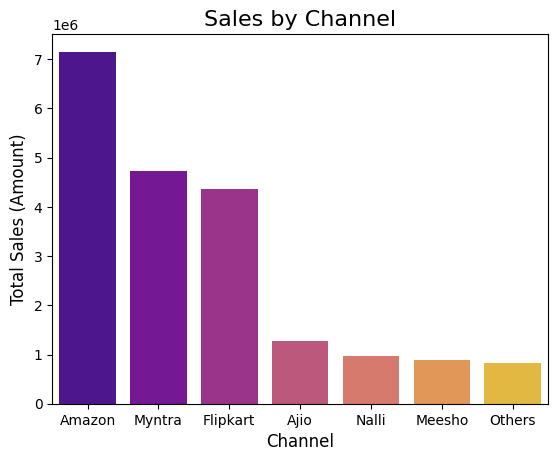

In [22]:
 # 3. Sales by Channel (Bar Chart)
plt.subplot()
channel_sales = df.groupby('channel')['amount'].sum().sort_values(ascending=False)
sns.barplot(x=channel_sales.index, y=channel_sales.values, palette='plasma')
plt.title('Sales by Channel', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Total Sales (Amount)', fontsize=12)

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_73796\2628827427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_sales.index, x=state_sales.values, palette='magma', orient='h')


Text(0, 0.5, 'State')

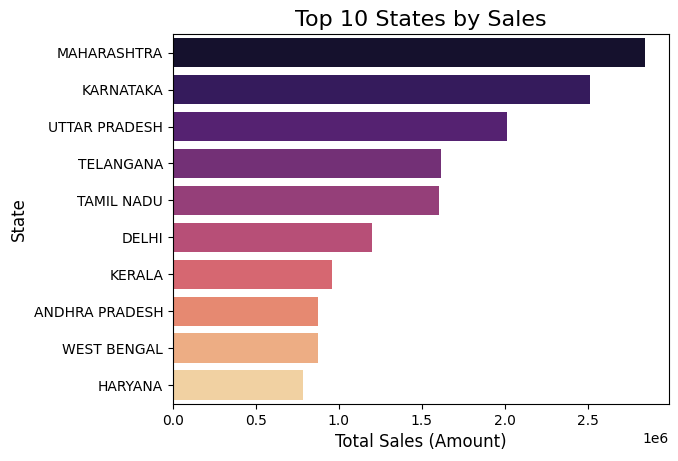

In [26]:
# 4. Top 10 States by Sales (Horizontal Bar Chart)
plt.subplot()
state_sales = df.groupby('ship_state')['amount'].sum().nlargest(10)
sns.barplot(y=state_sales.index, x=state_sales.values, palette='magma', orient='h')
plt.title('Top 10 States by Sales', fontsize=16)
plt.xlabel('Total Sales (Amount)', fontsize=12)
plt.ylabel('State', fontsize=12)

Text(0, 0.5, '')

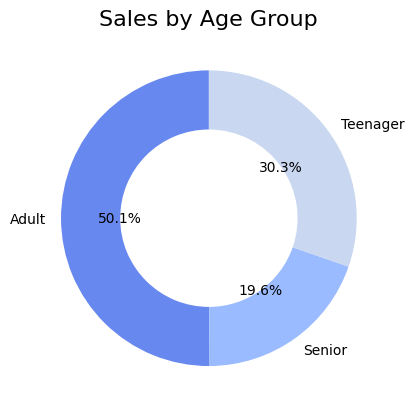

In [27]:
# 5. Sales by Age Group (Donut Chart)
plt.subplot()
age_group_sales = df.groupby('age_group')['amount'].sum()
plt.pie(age_group_sales, labels=age_group_sales.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm'), wedgeprops=dict(width=0.4))
plt.title('Sales by Age Group', fontsize=16)
plt.ylabel('') # Hide the y-label

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_73796\4190969486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_sales.index, x=category_sales.values, palette='cividis', orient='h')


Text(0, 0.5, 'Category')

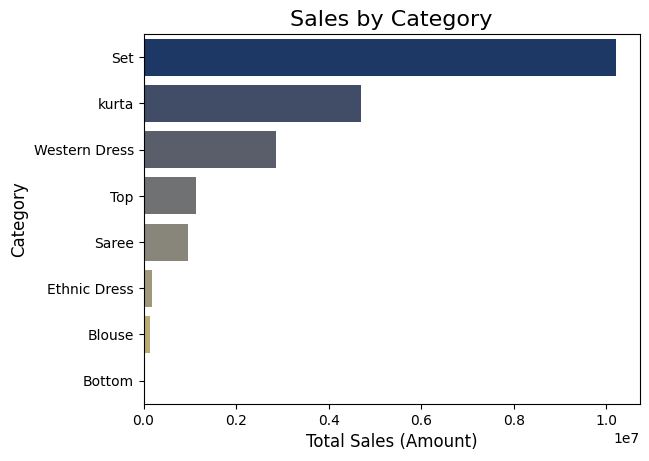

In [28]:
# 6. Sales by Category (Horizontal Bar Chart)
plt.subplot()
category_sales = df.groupby('category')['amount'].sum().sort_values(ascending=False)
sns.barplot(y=category_sales.index, x=category_sales.values, palette='cividis', orient='h')
plt.title('Sales by Category', fontsize=16)
plt.xlabel('Total Sales (Amount)', fontsize=12)
plt.ylabel('Category', fontsize=12)

In [29]:
  # --- KPIs: Total Sales and Orders ---
total_sales = df['amount'].sum()
total_orders = df['order_id'].nunique()

Text(0.5, 1.0, 'Key Performance Indicators (KPIs)')

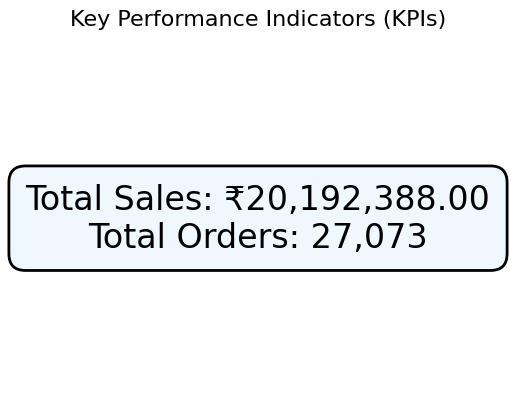

In [31]:
 # Display KPIs in a text box on the plot
kpi_text = f'Total Sales: ₹{total_sales:,.2f}\nTotal Orders: {total_orders:,}'
plt.subplot()
plt.text(0.5, 0.5, kpi_text, ha='center', va='center', fontsize=24, bbox=dict(boxstyle="round,pad=0.5", fc="aliceblue", ec="black", lw=2))
plt.axis('off')
plt.title('Key Performance Indicators (KPIs)', fontsize=16)

In [32]:
# Adjust layout and display the plots
plt.tight_layout(pad=4.0)
plt.show()

<Figure size 640x480 with 0 Axes>